In [ ]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import json, codecs
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [ ]:
#Unsupervised learning yaptığım için labelim yok yani y_train diye bölmeme gerek label için.
(x_train, _),(x_test, _ ) = fashion_mnist.load_data() #train datasetini kullanmıyorum fakat program tanımla diyor bende kullanmadığım değişken yerine _ koydum.

4423680/4422102 [==============================] - 1s 0us/step


In [ ]:
print(type(x_train))

<class 'numpy.ndarray'>


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train.shape[1:]

(28, 28)

In [ ]:
x_train = x_train.reshape((len(x_train), x_train.shape[1:][0]*x_train.shape[1:][1]))

In [ ]:
x_test = x_test.reshape((len(x_test), x_test.shape[1:][0]*x_test.shape[1:][1]))

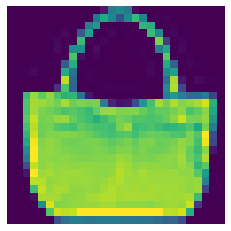

In [ ]:
plt.imshow(x_train[100].reshape(28,28)) #matplotlib de görselleştirme yapabilmek için reshape yaptık
plt.axis("off")
plt.show()

In [ ]:
#Resimlerimiz tamam, şimdi autoencoder yapacaz. input 784 nuerondan oluşacak çünkü 28*28 yaptık ya.
input_img = Input(shape=(784,)) #input layer tamamlandı.
encoded = Dense(32, activation = 'relu',)(input_img) #encoder oluşturuldu. 32 layerlı. input_img yazdın birbirine bağlamak için
encoded = Dense(16, activation = 'relu',)(encoded) #encoder yaptım bir tane daha. Parantez içleri birbirine bağlamak için kullanıyoruz.
decoded = Dense(32, activation = 'relu',)(encoded)
output = Dense(784, activation = 'sigmoid',)(decoded)
autoencoder = Model(input_img,output) #autoencoder modeli oluşturuldu. Şimdi compile edecez.

In [ ]:
autoencoder.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

In [ ]:
history = autoencoder.fit(x_train, x_train, epochs = 25, batch_size = 256, shuffle = True, validation_data = (x_train,x_train)) #input ve output aynı olduğu için x_train veriyoruz 

Train on 60000 samples, validate on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 4s 61us/step - loss: 0.4007 - val_loss: 0.3475
Epoch 2/25
60000/60000 [==============================] - 3s 57us/step - loss: 0.3385 - val_loss: 0.3291
Epoch 3/25
60000/60000 [==============================] - 3s 56us/step - loss: 0.3265 - val_loss: 0.3212
Epoch 4/25
60000/60000 [==============================] - 3s 55us/step - loss: 0.3202 - val_loss: 0.3180
Epoch 5/25
60000/60000 [==============================] - 3s 57us/step - loss: 0.3160 - val_loss: 0.3141
Epoch 6/25
60000/60000 [==============================] - 3s 57us/step - loss: 0.3129 - val_loss: 0.3134
Epoch 7/25
60000/60000 [==============================] - 3s 57us/step - loss: 0.3104 - val_loss: 0.3082
Epoch 8/25
60000/60000 [==============================] - 3s 57us/step - loss: 0.3082 - val_loss: 0.3067
Epoch 9/25
60000/60000 [==============================] - 4s 60us/step - loss: 0.3060 - val_loss: 0.3046
Epoch

In [ ]:
#Günler sürecek olan çalışmalarda işine yarar.
autoencoder.save_weights("autoencoder_model.h5")

In [ ]:
#evaluation
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


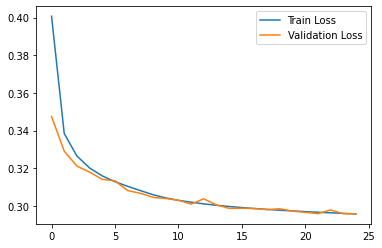

In [ ]:
plt.plot(history.history["loss"],label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()

In [ ]:
#save history. Günler süren algoritmadan sonra elde ettiğimiz verileri kaydetmeyi unutmayalım.
with open("autoencoders_hist.json","w") as f:
  json.dump(history.history,f)

In [ ]:
#load history
with codecs.open("autoencoders_hist.json","r",encoding="utf8") as f:
  n = json.loads(f.read())

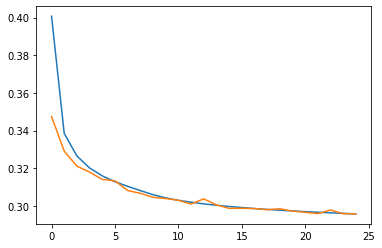

In [ ]:
plt.plot(n["loss"],label = "Train Loss")
plt.plot(n["val_loss"],label = "Validation Loss")

In [ ]:
#Encoder Modeline soktuğumuz zaman nasıl bir sonuç elde ettik
encoder = Model(input_img,encoded)
encoded_img = encoder.predict(x_test)

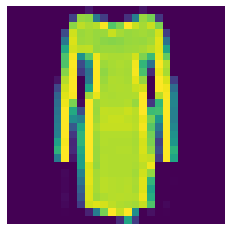

In [ ]:
plt.imshow(x_test[1500].reshape(28,28))
plt.axis("off")
plt.show()

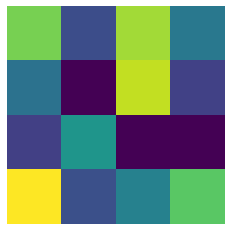

In [ ]:
plt.imshow(encoded_img[1500].reshape(4,4))
plt.axis("off")
plt.show()

In [ ]:
decodes_imgs = autoencoder.predict(x_test)

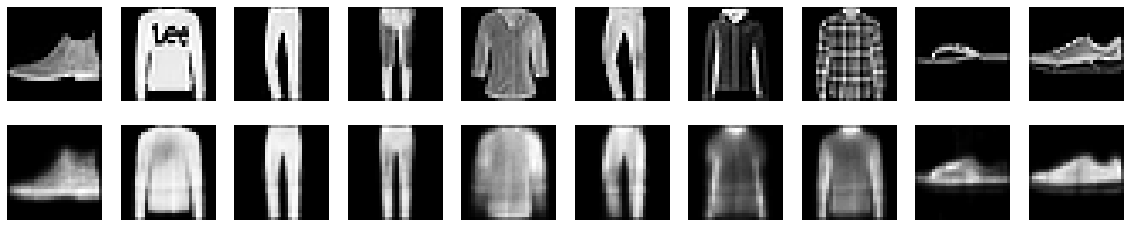

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodes_imgs[i].reshape(28, 28))
    plt.axis("off")
plt.show()